# Task 1: Logistic Regression for Binary Classification

## Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Load Data

In [2]:
# Load Data
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

data1 = pd.read_csv(os.path.join(DATA_DIR, "churn-bigml-20.csv"))
data2 = pd.read_csv(os.path.join(DATA_DIR, "churn-bigml-80.csv"))

In [3]:
print("churn-bigml-20.csv Data:")
display(data1)
print("churn-bigml-80.csv Data:")
display(data2)

churn-bigml-20.csv Data:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


churn-bigml-80.csv Data:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [4]:
print("churn-bigml-20.csv Data Shape:", data1.shape)
print("churn-bigml-80.csv Data Shape:", data2.shape)

churn-bigml-20.csv Data Shape: (667, 20)
churn-bigml-80.csv Data Shape: (2666, 20)


In [5]:
data = pd.concat([data1, data2], ignore_index=True)

## Preprocessing Data

In [6]:
# Preprocessing
data.drop(columns=["State", "Area code"], inplace=True)
data["International plan"] = data["International plan"].map({"No": 0, "Yes": 1})
data["Voice mail plan"] = data["Voice mail plan"].map({"No": 0, "Yes": 1})
data["Churn"] = data["Churn"].astype(int)

## Split Data

In [7]:
# Split Data
X = data.drop(columns=["Churn"])
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Model

In [8]:
# Train Model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

## Predict

In [9]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

## Evaluate

In [10]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

## Coefficients & Odds Ratio

In [11]:
# Coefficients & Odds Ratio
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
coefficients["Odds Ratio"] = np.exp(coefficients["Coefficient"])

## ROC Curve

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

## Result & isualization

In [17]:
# Print Results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)
print("Feature Importance (Odds Ratio):")
display(coefficients.sort_values(by="Odds Ratio", ascending=False))

Accuracy: 0.863568215892054

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       571
           1       0.56      0.23      0.33        96

    accuracy                           0.86       667
   macro avg       0.72      0.60      0.63       667
weighted avg       0.84      0.86      0.84       667

Feature Importance (Odds Ratio):


,Feature,Coefficient,Odds Ratio
1,International plan,1.945665,6.998281
16,Customer service calls,0.478428,1.613536
13,Total intl minutes,0.066187,1.068427
3,Number vmail messages,0.042721,1.043647
15,Total intl charge,0.034669,1.035277
6,Total day charge,0.011408,1.011474
4,Total day minutes,0.011084,1.011146
7,Total eve minutes,0.007087,1.007112
10,Total night minutes,0.003162,1.003167
12,Total night charge,0.002257,1.002260


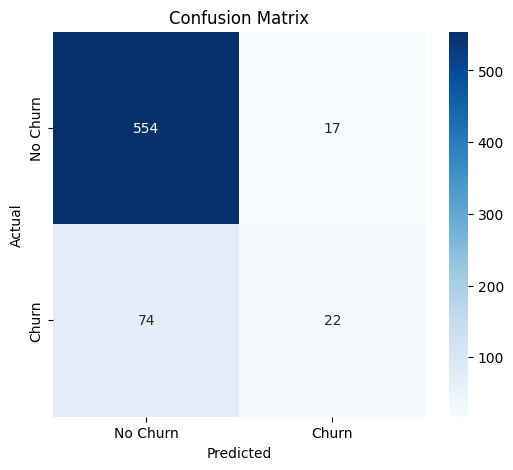

In [14]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

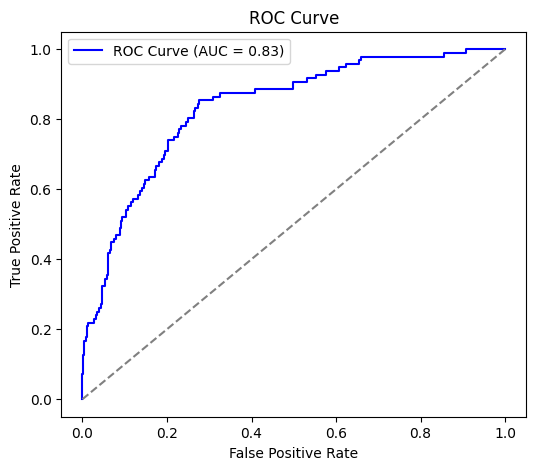

In [15]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()